<a href="https://colab.research.google.com/github/youngchul-sung/deep-learning-with-python/blob/master/3_5_classifying_newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

from tensorflow import keras
keras.__version__

TensorFlow 2.x selected.


'2.2.4-tf'

In [0]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
train_labels[10]

3

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [0]:
# def to_one_hot(labels, dimension=46):
#     results = np.zeros((len(labels), dimension))
#     for i, label in enumerate(labels):
#         results[i, label] = 1.
#     return results

# # 훈련 레이블 벡터 변환
# one_hot_train_labels = to_one_hot(train_labels)
# # 테스트 레이블 벡터 변환
# one_hot_test_labels = to_one_hot(test_labels)

from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 181us/sample - loss: 2.6469 - accuracy: 0.5172 - val_loss: 1.7720 - val_accuracy: 0.6270
Epoch 2/20
7982/7982 [==============================] - 1s 120us/sample - loss: 1.4349 - accuracy: 0.6982 - val_loss: 1.3334 - val_accuracy: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 121us/sample - loss: 1.0648 - accuracy: 0.7717 - val_loss: 1.1449 - val_accuracy: 0.7500
Epoch 4/20
7982/7982 [==============================] - 1s 125us/sample - loss: 0.8377 - accuracy: 0.8220 - val_loss: 1.0513 - val_accuracy: 0.7810
Epoch 5/20
7982/7982 [==============================] - 1s 118us/sample - loss: 0.6638 - accuracy: 0.8566 - val_loss: 0.9749 - val_accuracy: 0.7940
Epoch 6/20
7982/7982 [==============================] - 1s 120us/sample - loss: 0.5306 - accuracy: 0.8916 - val_loss: 0.9365 - val_accuracy: 0.7970
Epoch 7/20
7982/7982 [==============================] - 1s 119us

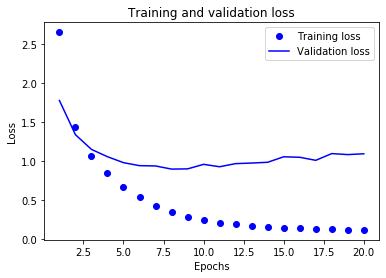

In [15]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

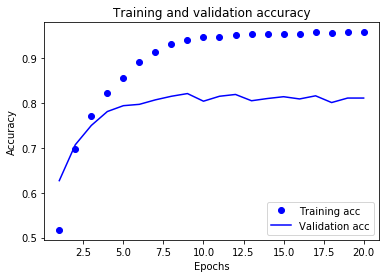

In [16]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 173us/sample - loss: 2.5688 - accuracy: 0.5308 - val_loss: 1.7325 - val_accuracy: 0.6550
Epoch 2/9
7982/7982 [==============================] - 1s 118us/sample - loss: 1.4204 - accuracy: 0.7077 - val_loss: 1.3041 - val_accuracy: 0.7120
Epoch 3/9
7982/7982 [==============================] - 1s 119us/sample - loss: 1.0530 - accuracy: 0.7727 - val_loss: 1.1463 - val_accuracy: 0.7490
Epoch 4/9
7982/7982 [==============================] - 1s 120us/sample - loss: 0.8333 - accuracy: 0.8245 - val_loss: 1.0546 - val_accuracy: 0.7730
Epoch 5/9
7982/7982 [==============================] - 1s 118us/sample - loss: 0.6706 - accuracy: 0.8606 - val_loss: 0.9705 - val_accuracy: 0.8050
Epoch 6/9
7982/7982 [==============================] - 1s 123us/sample - loss: 0.5406 - accuracy: 0.8880 - val_loss: 0.9269 - val_accuracy: 0.8100
Epoch 7/9
7982/7982 [==============================] - 1s 119us/sample

In [18]:
results

[1.0152764127175933, 0.77916294]

In [19]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18432769367764915

In [0]:
predictions = model.predict(x_test)

In [21]:
predictions[0].shape

(46,)

In [22]:
np.sum(predictions[0])

0.99999994

In [23]:
np.argmax(predictions[0])

3

In [0]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [0]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [26]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 215us/sample - loss: 2.8404 - accuracy: 0.2369 - val_loss: 2.0099 - val_accuracy: 0.5960
Epoch 2/20
7982/7982 [==============================] - 1s 155us/sample - loss: 1.6014 - accuracy: 0.6337 - val_loss: 1.4606 - val_accuracy: 0.6320
Epoch 3/20
7982/7982 [==============================] - 1s 156us/sample - loss: 1.2672 - accuracy: 0.6610 - val_loss: 1.3420 - val_accuracy: 0.6580
Epoch 4/20
7982/7982 [==============================] - 1s 155us/sample - loss: 1.1052 - accuracy: 0.7016 - val_loss: 1.2833 - val_accuracy: 0.6700
Epoch 5/20
7982/7982 [==============================] - 1s 156us/sample - loss: 0.9831 - accuracy: 0.7446 - val_loss: 1.2586 - val_accuracy: 0.6990
Epoch 6/20
7982/7982 [==============================] - 1s 159us/sample - loss: 0.8834 - accuracy: 0.7667 - val_loss: 1.2307 - val_accuracy: 0.7100
Epoch 7/20
7982/7982 [==============================] - 1s 160us